In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.DataFrame()       # load DISCVR data

for n in range(8):      # file names
    df = pd.read_csv("dsc_fc_summed_spectra_" + str(2016+n) + "_v01.csv", delimiter = ',',
                      parse_dates=[0], infer_datetime_format=True, na_values= 0, header = None)
    data = pd.concat([data, df], ignore_index=True)

data = data.set_index(0)
data = data.rename(columns={1:'Bx', 2:'By', 3:'Bz'})
data = data.sort_index()

pd.set_option('display.float_format', '{:10,.3f}'.format)
display(data)

In [ ]:
df = data.notna()

for c in df.columns:
    print(df[c].value_counts(normalize=True), '\n -------------------')

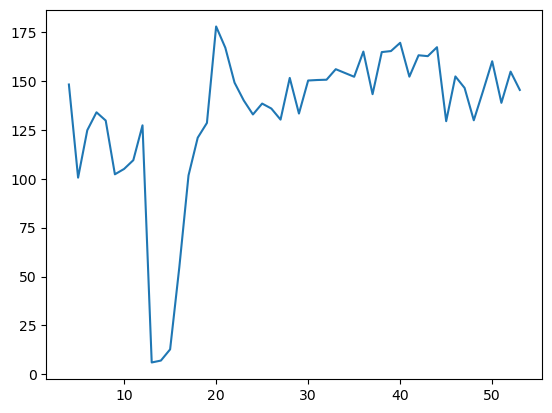

In [4]:
ws = data.loc[:, 4:53].iloc[1000]       # plot wind data for index 1000
plt.plot(ws)
plt.show()

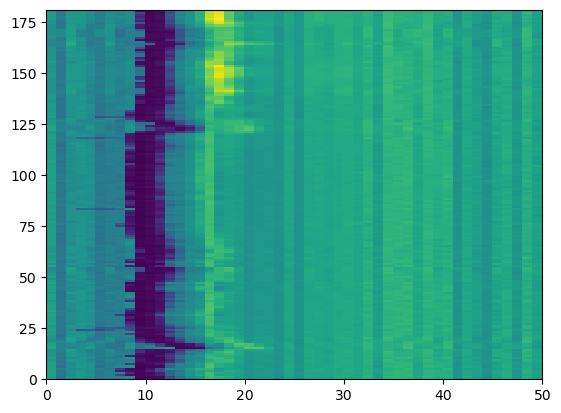

In [5]:
a = data.loc[:, 4:]         # color plot wind data for times 16:00 to 19:00

a = a.loc['2016-01-01 16:00:00':'2016-01-01 19:00:00', :]

plt.pcolor(a)
plt.show()

In [ ]:
s = data.index.to_series().diff().dt.total_seconds()/60.0   # add columns to data, drop wind channels and Bx,By
a = data.loc[:, 4:53]
weighted = np.ones(a.shape, dtype=float)

data['B'] = np.sqrt(data['Bx']**2+data['By']**2+data['Bz']**2)
data['w'] = a.mul(weighted, fill_value=0).mean(axis=1)
data['dBz/dt'] = data['Bz'].diff()/s
data['dB/dt'] = data['B'].diff()/s
data['dw/dt'] = data['w'].diff()/s

data = data.drop(data.loc[:, 4:53].columns, axis=1)
data = data.drop(columns=['Bx','By'])

display(data)

In [ ]:
hour_data = data.resample('3H').mean()      # avereage data over 3 hours

hour_data['B_min'] = data['B'].resample('3H').min()
hour_data['B_max'] = data['B'].resample('3H').max()
hour_data['Bz_min'] = data['Bz'].resample('3H').min()
hour_data['Bz_max'] = data['Bz'].resample('3H').max()
hour_data['w_min'] = data['w'].resample('3H').min()
hour_data['w_max'] = data['w'].resample('3H').max()

display(hour_data)

In [ ]:
kp = pd.read_csv("kp_data.txt", delim_whitespace=True, header=None)     # load Kp data
kp = kp.rename(columns={0:'year', 1:'month', 2:'days', 3:'hours'})

ind = pd.to_datetime(kp.loc[:, 'year':'hours'])
kp = kp.set_index(ind)

display(kp)

In [ ]:
hour_data['Kp'] = kp[7]     # add Kp column to hour_data
display(hour_data)

In [ ]:
hour_data.to_csv('/Users/ngalanis/git/educational/discovr/hour_data.csv')      # save hour_data

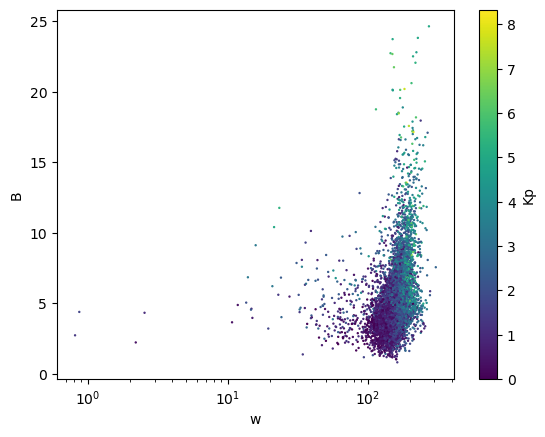

In [10]:
hour_data.loc['2016-01-01 00:00:00':'2020-01-01 00:00:00', :].plot.scatter(x='w', y='B', c='Kp', s = 0.5)
plt.xscale('log')

In [ ]:
xs = ['w','w_min', 'w_max']
ys = ['Bz', 'B', 'dB/dt', 'dBz/dt', 'B_min', 'B_max', 'Bz_min', 'Bz_max']
phs = [['2016-01-01 00:00:00', '2020-01-01 00:00:00'],['2020-01-01 00:00:00', '2023-05-02 00:00:00']]
names = ['phase_A', 'phase_B']

In [ ]:

for name,ph in zip(names, phs):
    for x in xs:
        for y in ys:
            hour_data.loc[ph[0]:ph[1], :].plot.scatter(x=x, y=y, c='Kp', s = 0.5)
            plt.xscale('log')
            plt.title(name)


